# TRD-672

In [1]:
%use hyper-collate(1.3.5-SNAPSHOT-9)

Welcome to HyperCollate 1.3.5-SNAPSHOT-9
Using GraphViz: dot - graphviz version 2.40.1 (20161225.0304)



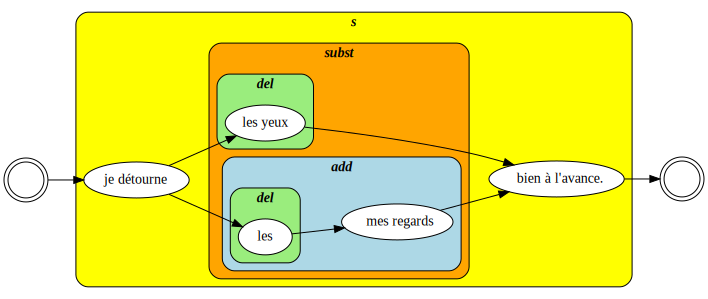

In [2]:
val wA = HC.importXMLWitness("A", """
            <s>je détourne <subst><del>les yeux</del><add><del instant="true">les</del> mes regards</add></subst> bien à l'avance.</s>
            """.trimMargin())
val wB = HC.importXMLWitness("B", """
            <s>je détourne mes regards.</s>
            """.trimMargin())
wA.show()

In [3]:
val cg = HC.collate(wA,wB)
cg.asHtml()

A,je détourne,les mes regardsles yeux,bien à l'avance,.
B,je détourne,mes regards,,.


In [4]:
cg.asASCIITable()

┌───┬────────────┬───────────────┬────────────────┬─┐
│[A]│            │[+] mes regards│                │ │
│   │            │[-] les        │                │ │
│   │je détourne │[-] les yeux   │bien à l'avance │.│
├───┼────────────┼───────────────┼────────────────┼─┤
│[B]│je détourne │mes regards    │                │.│
└───┴────────────┴───────────────┴────────────────┴─┘

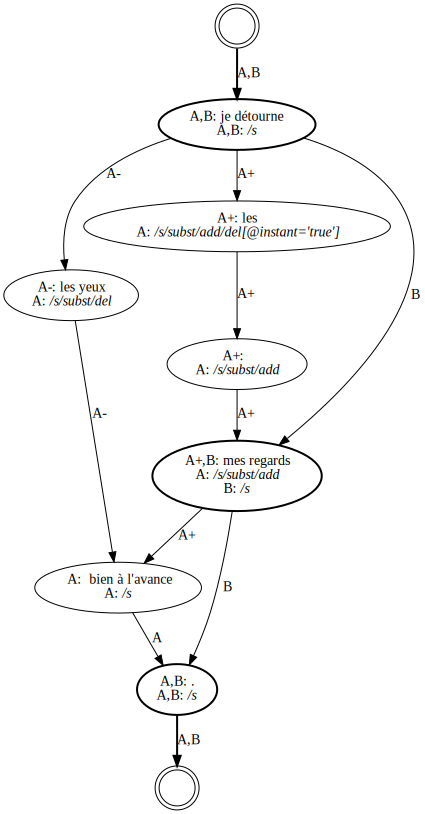

In [5]:
cg.show()